In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dir_data = './data/'

In [29]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))

def load_csv_data(file):
       return pd.read_csv(file)
    
f_app_train = load_csv_data("application_train.csv")
f_app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
f_app_train['DAYS_EMPLOYED']


0           -637
1          -1188
2           -225
3          -3039
4          -3038
5          -1588
6          -3130
7           -449
8         365243
9          -2019
10          -679
11        365243
12         -2717
13         -3028
14          -203
15         -1157
16         -1317
17          -191
18         -7804
19         -2038
20         -4286
21         -1652
22         -4306
23        365243
24          -746
25         -3494
26         -2628
27         -1234
28         -1796
29         -1010
           ...  
307481     -3147
307482      -226
307483    365243
307484      -328
307485      -670
307486     -1185
307487    365243
307488     -1218
307489      -286
307490     -1928
307491     -1953
307492     -1618
307493     -2306
307494     -6573
307495     -7438
307496     -2178
307497     -1222
307498     -3689
307499     -8694
307500     -5326
307501     -1046
307502     -8736
307503      -399
307504     -7258
307505    365243
307506      -236
307507    365243
307508     -79

In [31]:
sub_df = f_app_train[f_app_train['DAYS_EMPLOYED'] != 365243]


In [32]:
f_app_train.corr()['TARGET']


SK_ID_CURR                    -0.002108
TARGET                         1.000000
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                     0.078239
DAYS_EMPLOYED                 -0.044932
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
HOUR_APPR_PROCESS_START       -0.024166
REG_REGION_NOT_LIVE_REGION     0.005576
REG_REGION_NOT_WORK_REGION     0.006942


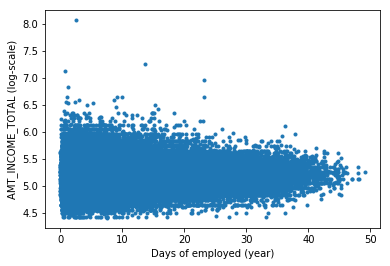

Correlation: 0.0380


In [26]:
plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), np.log10(sub_df['AMT_INCOME_TOTAL'] ), '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (log-scale)')
plt.show()
corr = np.corrcoef(sub_df['DAYS_EMPLOYED'] / (-365), np.log10(sub_df['AMT_INCOME_TOTAL']))
print("Correlation: %.4f" % (corr[0][1]))

In [27]:
f_app_train.corr()['DAYS_EMPLOYED'].sort_values().head(15)

FLAG_EMP_PHONE                -0.999755
DAYS_BIRTH                    -0.615864
DAYS_ID_PUBLISH               -0.272378
REG_CITY_NOT_WORK_CITY        -0.254559
FLAG_DOCUMENT_3               -0.249082
CNT_CHILDREN                  -0.239818
FLAG_WORK_PHONE               -0.233972
CNT_FAM_MEMBERS               -0.233549
LIVE_CITY_NOT_WORK_CITY       -0.218101
DAYS_REGISTRATION             -0.210242
FLAG_DOCUMENT_8               -0.121571
REG_REGION_NOT_WORK_REGION    -0.107150
AMT_ANNUITY                   -0.104332
LIVE_REGION_NOT_WORK_REGION   -0.095539
HOUR_APPR_PROCESS_START       -0.091138
Name: DAYS_EMPLOYED, dtype: float64

In [35]:
f_app_train.corr()['DAYS_EMPLOYED'].sort_values().tail(15)

YEARS_BEGINEXPLUATATION_MODE    0.008637
FLAG_CONT_MOBILE                0.012745
DEF_60_CNT_SOCIAL_CIRCLE        0.014211
FLAG_PHONE                      0.015291
AMT_REQ_CREDIT_BUREAU_QRT       0.015345
DEF_30_CNT_SOCIAL_CIRCLE        0.016717
DAYS_LAST_PHONE_CHANGE          0.023032
OWN_CAR_AGE                     0.028830
REGION_RATING_CLIENT            0.032750
REGION_RATING_CLIENT_W_CITY     0.034624
AMT_REQ_CREDIT_BUREAU_YEAR      0.049988
EXT_SOURCE_3                    0.113434
EXT_SOURCE_1                    0.289848
FLAG_DOCUMENT_6                 0.597484
DAYS_EMPLOYED                   1.000000
Name: DAYS_EMPLOYED, dtype: float64

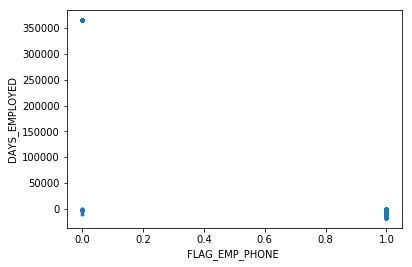

In [38]:
plt.plot(f_app_train['FLAG_EMP_PHONE'],f_app_train['DAYS_EMPLOYED'],'.')
plt.xlabel('FLAG_EMP_PHONE ')
plt.ylabel('DAYS_EMPLOYED')
plt.show()

In [ ]:
f_app_train.boxplot(by='DAYS_EMPLOYED', column='FLAG_EMP_PHONE')